In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import re
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.probability import FreqDist
from sklearn.feature_extraction import text

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


### creating a data frame and adding the reviews in it

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [5]:
### saving the dataframe as csv file in system
df.to_csv("data.csv")

In [4]:
df

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...
...,...
995,✅ Trip Verified | Aberdeen to Boston via Lond...
996,✅ Trip Verified | London to Hamburg. Baggage ...
997,✅ Trip Verified | Flew London Heathrow to Hong...
998,✅ Trip Verified | Flew to Istanbul with Britis...


In [5]:
df.iloc[2,:]

reviews    ✅ Trip Verified |  Online check in worked fine...
Name: 2, dtype: object

### created a user defined function to clean the sentence

In [6]:
def preprocessed_text(sentence):
    ### removing all the special characters from the sentence
    sentence=re.sub(pattern=r'[^a-zA-Z]',repl=' ',string=sentence)
    ### converting it into lowercase
    sentence=sentence.lower()
    ### here we are removing the url link from the sentence
    sentence=re.sub(pattern=r'http\S+',repl=' ',string=sentence)
    ### splitting the sentence into words
    sentence=sentence.split()
    ### removing the stopwords
    sentence=[word for word in sentence if not word in nltk.corpus.stopwords.words('english')]
    ### making it into sentence
    sentence=' '.join(sentence)
    ### Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    
    return lemmatized_sentence

In [7]:
new=[]
for i in tqdm(df.reviews):
    new.append(preprocessed_text(i))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.54it/s]


### concating the cleaned reviews with the dataframe

In [8]:
df['cleaned_reviews']=new

In [9]:
df

,reviews,cleaned_reviews
0,Not Verified | Top Ten REASONS to not use Brit...,verified top ten reason use british airway awa...
1,Not Verified | Easy check in on the way to He...,verified easy check way heathrow flight time i...
2,✅ Trip Verified | Online check in worked fine...,trip verified online check worked fine quick s...
3,✅ Trip Verified |. The BA first lounge at Term...,trip verified ba first lounge terminal zoo pm ...
4,Not Verified | Paid a quick visit to Nice yest...,verified paid quick visit nice yesterday heath...
...,...,...
995,✅ Trip Verified | Aberdeen to Boston via Lond...,trip verified aberdeen boston via london heath...
996,✅ Trip Verified | London to Hamburg. Baggage ...,trip verified london hamburg baggage self chec...
997,✅ Trip Verified | Flew London Heathrow to Hong...,trip verified flew london heathrow hong kong b...
998,✅ Trip Verified | Flew to Istanbul with Britis...,trip verified flew istanbul british airway th ...


### Plotting a wordcloud image to show the important words in the review

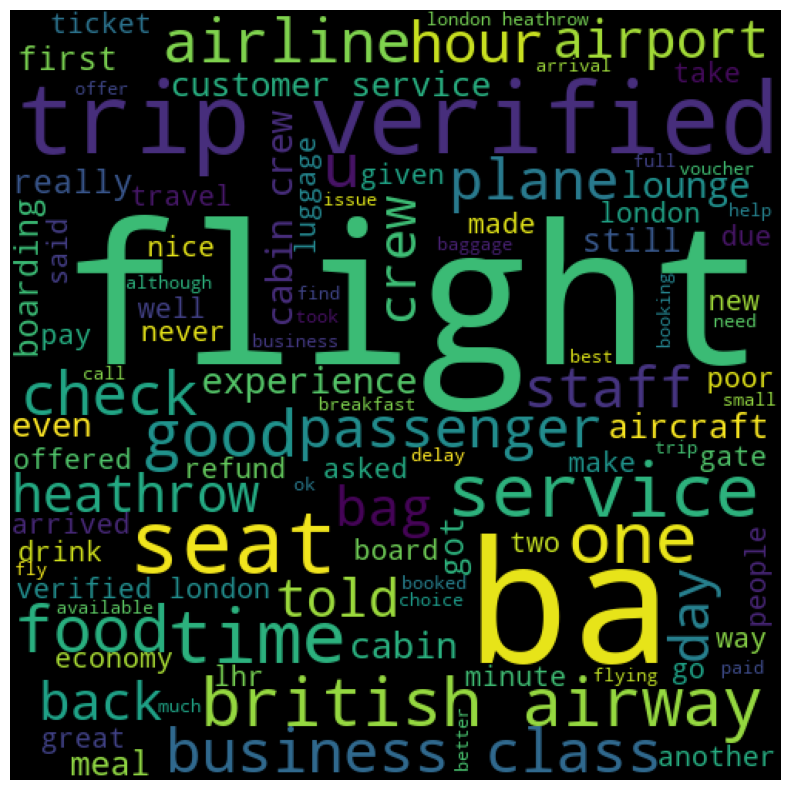

In [44]:
words = ''
for msg in df['cleaned_reviews']:
    msg = msg.lower()
    words+=msg + ' '
wordcloud = WordCloud(width=500,height=500,max_words=100).generate(words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Removing some words which are not useful to predict whether the reviews are positive or negative 

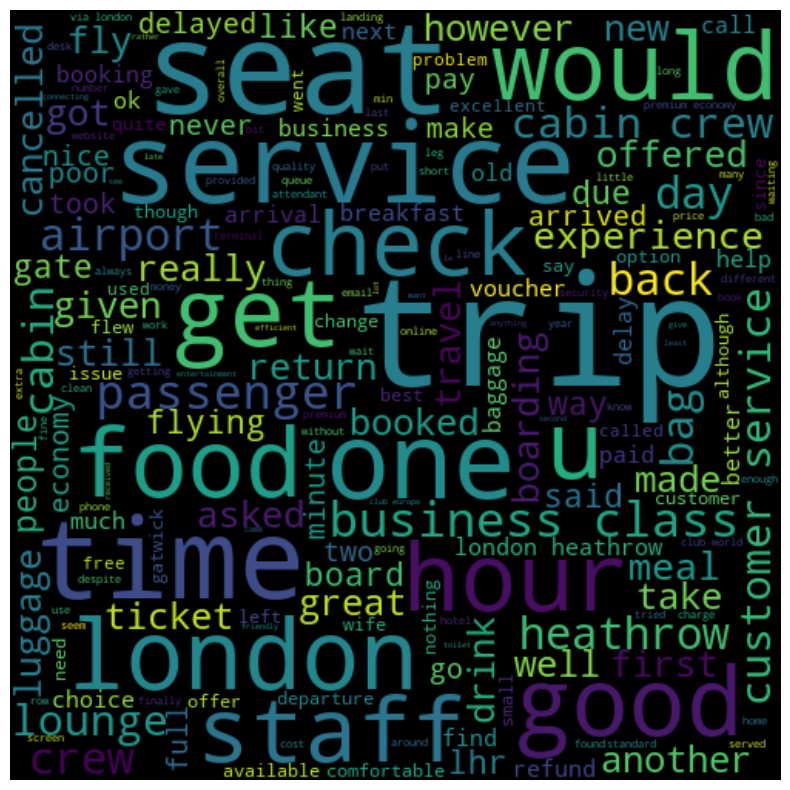

In [23]:
reviews = " ".join(df.cleaned_reviews)
plt.figure(figsize=(20,10))
stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "verified", "aircraft", "could","even"])
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=200, stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
words = reviews.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","verified","review"])
new_words = [word for word in words if word not in stopwords]
nlp_words=FreqDist(new_words).most_common(20)
all_fdist = pd.Series(dict(nlp_words))

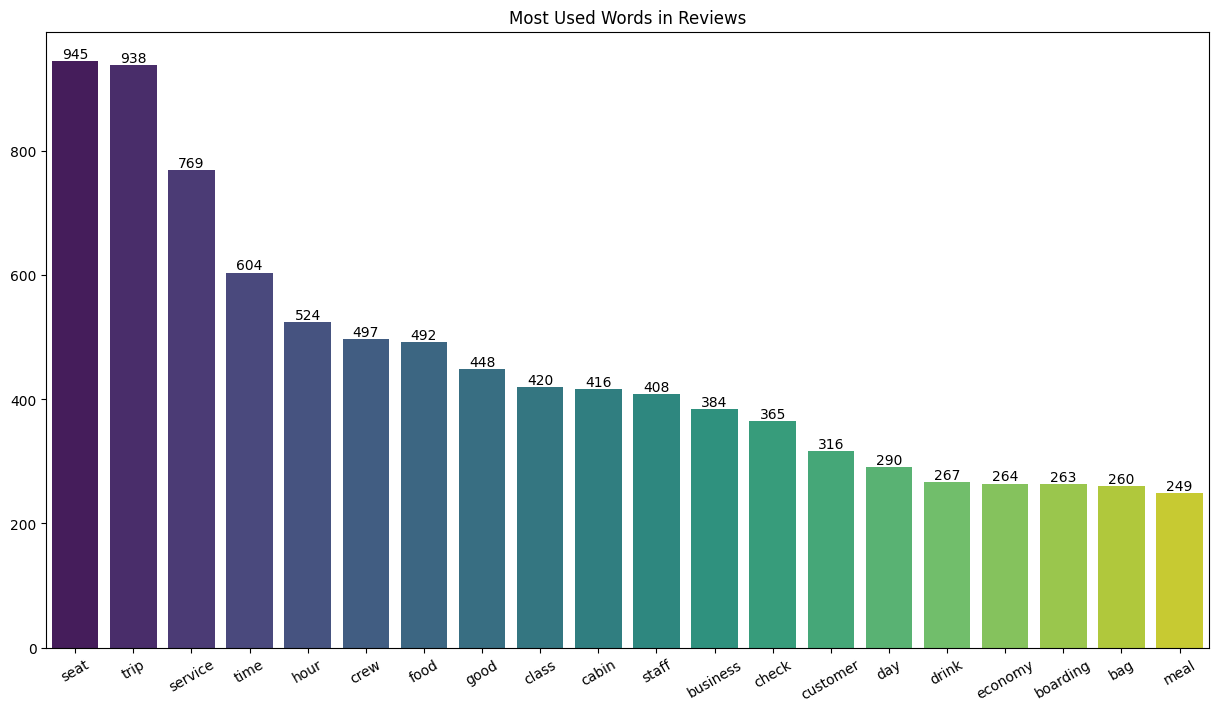

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Most Used Words in Reviews')
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax,palette='viridis')
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.show()

### From this Graph we can say what are the most common words, passegers are using while giving review about British Airways